<a href="https://colab.research.google.com/github/MatheusMach/EstudosRedeNeural/blob/main/Heuristica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabela de dados

Id	Peso	Valor
1	32		727
2	40		763
3	44		60
4	20		606
5	1		45
6	29		370
7	3		414
8	13		880
9	6		133
10	39		820


HEURISTICA GULOSA
Solucaoi inicial para Heurística de Busca por Modificação

Peso: 104
Lucro: 3175
Fra: [2, 3, 10]
Dentro: [7, 8, 5, 4, 1, 9, 6]
Binario: [1, 0, 0, 1, 1, 1, 1, 1, 1, 0] 

T inicial =  417.5
Solucão final da Heurística de Busca por Modificação

Peso: 113
Lucro: 3580
Fora: [2, 3, 6, 5]
Dentro: [8, 10, 7, 4, 1, 9]
Binario: [1, 0, 0, 1, 0, 0, 1, 1, 1, 1] 



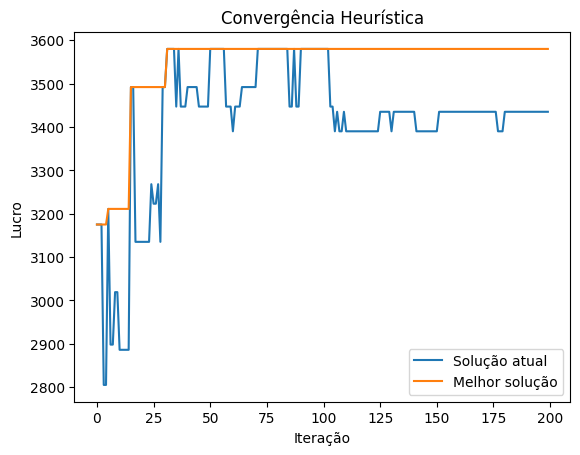

In [7]:
import matplotlib.pyplot as plt
import random

random.seed(1)

#Carregar o arquivo
f = open("dados.txt")
lin = f.readline()
v = lin.split(",")
ni = int(v[0])
CAP = int(v[1])

dados = []
for i in range(0,ni):
    lin = f.readline()
    v = lin.split(",")
    row = [int(v[0]),int(v[1]),int(v[2])]
    dados.append(row)


#Impressão da tabela de dados
print("Tabela de dados")
print("\nId\tPeso\tValor")
for row in dados:
    print("%d\t%d\t\t%d" % (row[0],row[1],row[2]))
#-------------------------------------------------

#HEURSITICA GULOSA PELA EFICIËNCIA

print("\n\nHEURISTICA GULOSA")

#A variável solucao armazena a solução atual, que inclui:
#dentro: Lista de itens que estão dentro da mochila.
#fora: Lista de itens que estão fora da mochila.
#binario: Lista binária indicando se cada item está (1) ou não está (0) na mochila.
#peso: Peso total dos itens na mochila.
#lucro: Valor total dos itens na mochila.

solucao = {"dentro":[],"fora":[],"binario":[0]*ni,"peso":0,"lucro":0} #Inicialização da Heuristica

#Calcular eficiência
for obj in dados:
    obj.append(obj[2]/obj[1])
    solucao['fora'].append(obj[0])

dados_eficiencia = sorted(dados,key=lambda row: -row[3])


#Preenchimento da eurística
for obj in dados_eficiencia:
    if(obj[1] + solucao['peso'] <= CAP):
        solucao['binario'][obj[0]-1] = 1
        solucao.update({'peso':solucao['peso']+obj[1]})
        solucao.update({'lucro':solucao['lucro']+obj[2]})
        solucao['fora'].remove(obj[0])
        solucao['dentro'].append(obj[0])

print('Solucaoi inicial para Heurística de Busca por Modificação')
print("\nPeso:",solucao['peso'])
print("Lucro:",solucao['lucro'])
print("Fra:",solucao['fora'])
print("Dentro:",solucao['dentro'])
print("Binario:",solucao['binario'],"\n")




def copys(solucao): ## cria uma cópia para ser modificada durante a busca
    return {'dentro':list(solucao['dentro']),
            'fora':list(solucao['fora']),
            'binario':list(solucao['binario']),
            'peso':solucao['peso'],
            'lucro':solucao['lucro']}



melhor = copys(solucao)

#FUNÇÕES DE MODIFICAÇÃO DA HEURISTICA

#Operador de adição na mochila
def oper_adicionar(sol):
    if(len(sol['fora'])==0):
        return -1

    i = random.choice(sol['fora'])

    sol['binario'][i-1] = 1
    sol.update({'peso':sol['peso']+dados[i-1][1]})
    sol.update({'lucro':sol['lucro']+dados[i-1][2]})
    sol['fora'].remove(i)
    sol['dentro'].append(i)

    return i

#Operador de remoção do item adicionado
def oper_remover(sol,j=-1):
    if(len(sol['dentro'])==0):
        return -1

    if(j==-1):
        j = random.choice(sol['dentro'])

    sol['binario'][j-1] = 0
    sol.update({'peso':sol['peso']-dados[j-1][1]})
    sol.update({'lucro':sol['lucro']-dados[j-1][2]})
    sol['dentro'].remove(j)
    sol['fora'].append(j)

    return j

def sol_viavel(sol):
    return sol['peso'] <= CAP

def sol_aceita(sol,T = 0):
    return sol['lucro'] > melhor['lucro'] - T

def sol_melhor(sol):
    return sol_aceita(sol)

T = ([max(i)-min(i) for i in zip(*dados)][2])/2
print('T inicial = ', T)
NITER = 200

k = 0
val_atual = []
val_melhor = []

##Função principal que realiza a busca heurística e tenta melhorar a solução inicial é executada dentro do loop principal de iteração
for iter in range(NITER):
    incumb = copys(solucao)

    i = oper_adicionar(incumb)

    if not sol_viavel(incumb):
        j = oper_remover(incumb)
        if i!=j and not sol_viavel(incumb):
            j2 = oper_remover(incumb,i)

    if sol_aceita(incumb,T):
        solucao = copys(incumb)

        if sol_melhor(solucao):
            melhor = copys(solucao)

    val_atual.append(solucao['lucro'])
    val_melhor.append(melhor['lucro'])

    k += 1
    if k == 15:
        T -= 20
        k = 0

print('Solucão final da Heurística de Busca por Modificação')
print("\nPeso:",melhor['peso'])
print("Lucro:",melhor['lucro'])
print("Fora:",melhor['fora'])
print("Dentro:",melhor['dentro'])
print("Binario:",melhor['binario'],"\n")

plt.plot(range(NITER),val_atual,label="Solução atual")
plt.plot(range(NITER),val_melhor,label="Melhor solução")
plt.title("Convergência Heurística")
plt.xlabel('Iteração')
plt.ylabel('Lucro')
plt.legend()
plt.show()




